# Тестовое задание “Маркетинговый аналитик” (стажировка)

Платформа для покупки рекламного трафика помогает рекламодателям со всего мира продвигать свои товары и услуги на различных площадках, максимально детализировано таргетироваться на целевую аудиторию, гибко менять настройки и отслеживать эффективность рекламных кампаний практически в режиме онлайн.

Одной из задач команды маркетинга является привлечение на платформу новых пользователей. Для этого используются различные инструменты: реклама в facebook (запрещёна в РФ) и google, email-рассылки, реферальные программы и прочее.

Нужно помочь руководителю отдела маркетинга определить ключевые метрики, которыми можно измерить:
- общую эффективность работы отдела маркетинга;
- эффективность финансовых вложений в тот или иной канал привлечения (источник трафика).

## Задачи
1. Рассчитать определённые метрики для всех каналов привлечения: количество транзакций, общий объём транзакций и доля новых пользователей.
3. Визуализировать сравнение источников на графике.
4. Сделать выводы, по возможности учитывая специфику бизнеса - стоит ли маркетингу изменить стратегию работы с источниками, и каким образом.

## Описание данных
- `user_id` - id пользователя;
- `invoice_id` - номер инвойса, который оплатил пользователь;
- `payment_id` - id транзакции (пополнение счёта через оплату инвойса);
- `Session default channel group` - источник, по которому пользователь перешёл на страницу оплаты;
- `payment_date` - дата транзакции;
- `payment_amount` - сумма транзакции;
- `is_ftd` - метка, обозначающая является ли данная транзакция первой для пользователя (FTD - First Time Deposit - первое пополнение).

## Изучение данных
Загружаем окружение и данные, получаем сведения о датасете.

In [1]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
# Загрузка данных
df = pd.read_csv('test_26062024.csv')

In [3]:
# Функция получения полной информации о датафрейме
def data_info (data):
    print('\033[1m' + 'Первые 10 строк:' + '\033[0m')
    display(data.head(10))
    print('-------------')
    print('\033[1m' + 'Последние 10 строк:' + '\033[0m')
    display(data.tail(10))
    print('-------------')
    print('\033[1m' + 'Типы данных:' + '\033[0m')
    display(data.info(memory_usage='deep'))
    print('-------------')
    print('\033[1m' + 'Полное статистическое описание:' + '\033[0m')
    display(data.describe(include = "all"))
    print('-------------')
    print('\033[1m' + 'Категориальные признаки:' + '\033[0m')
    display(data.describe(include=[object]))
    print('-------------')
    print('\033[1m' + 'Пропуски:' + '\033[0m')
    # Обход всех столбцов и проверка наличия пропущенных значений
    for i in data.columns:
        if data[i].isna().sum() > 0:
            print(f"Столбец {i} имеет {data[i].isna().sum()} пропусков\n")
        else:
            print(f"В столбце {i} пропусков НЕТ\n")
    print('-------------')
    print('\033[1m' + 'Доля пропусков от всех данных:' + '\033[0m')
    display(data.isna().mean().sort_values(ascending=False)*100)
    print('-------------')
    print('\033[1m' + 'Явные дубликаты:' + '\033[0m')
    if data.duplicated().sum() > 0:
        print('Дубликатов: ', data.duplicated().sum())
    else:
        print('Явных дублей НЕТ')
        
data_info(df)

Первые 10 строк:


,payment_id,user_id,invoice_id,Session default channel group,payment_date,is_ftd,payment_amount
0,75533919,94225,115359,Paid Search,1/31/2024,NaN,51.50
1,75533917,82453,115358,Referral,1/31/2024,NaN,51.50
2,75533911,94225,115357,Paid Search,1/31/2024,NaN,51.50
3,75533909,13708,115354,Organic Search,1/31/2024,NaN,150.68
4,75533907,94205,115353,Direct,1/31/2024,NaN,51.50
5,75533905,93642,115352,Direct,1/31/2024,NaN,52.50
6,75533900,94225,115351,Paid Search,1/31/2024,1.0,51.50
7,75533896,94205,115350,Direct,1/31/2024,NaN,51.50
8,75533891,33980,115349,Referral,1/31/2024,NaN,102.50
9,75533890,45328,115348,Paid Search,1/31/2024,NaN,300.00


-------------
Последние 10 строк:


,payment_id,user_id,invoice_id,Session default channel group,payment_date,is_ftd,payment_amount
1335,75500888,86800,112248,NaN,1/1/2024,NaN,100.0
1336,75500887,57602,112245,Direct,1/1/2024,NaN,250.0
1337,75500885,82587,112247,Paid Search,1/1/2024,NaN,51.5
1338,75500883,89128,112246,Direct,1/1/2024,NaN,51.5
1339,75500863,88158,112244,Paid Search,1/1/2024,NaN,51.5
1340,75500861,89027,112241,Paid Search,1/1/2024,NaN,103.0
1341,75500854,14084,112240,Direct,1/1/2024,NaN,102.5
1342,75500840,89184,112238,Cross-network,1/1/2024,1.0,51.5
1343,75500825,89027,112237,NaN,1/1/2024,NaN,51.5
1344,75500819,89128,112236,NaN,1/1/2024,NaN,51.5


-------------
Типы данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1345 entries, 0 to 1344
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   payment_id                     1345 non-null   int64  
 1   user_id                        1345 non-null   int64  
 2   invoice_id                     1345 non-null   int64  
 3   Session default channel group  1087 non-null   object 
 4   payment_date                   1345 non-null   object 
 5   is_ftd                         240 non-null    float64
 6   payment_amount                 1345 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 197.8 KB


None

-------------
Полное статистическое описание:


,payment_id,user_id,invoice_id,Session default channel group,payment_date,is_ftd,payment_amount
count,1.345000e+03,1345.000000,1345.000000,1087,1345,240.0,1345.000000
unique,NaN,NaN,NaN,9,31,NaN,NaN
top,NaN,NaN,NaN,Direct,1/3/2024,NaN,NaN
freq,NaN,NaN,NaN,563,75,NaN,NaN
mean,7.551702e+07,62942.318959,113724.494424,NaN,NaN,1.0,1027.546647
std,1.015501e+04,30907.057422,958.062263,NaN,NaN,0.0,7128.602300
min,7.550082e+07,60.000000,109149.000000,NaN,NaN,1.0,49.000000
25%,7.550770e+07,37224.000000,112953.000000,NaN,NaN,1.0,51.500000
50%,7.551738e+07,82478.000000,113738.000000,NaN,NaN,1.0,102.500000
75%,7.552611e+07,89872.000000,114542.000000,NaN,NaN,1.0,200.000000


-------------
Категориальные признаки:


,Session default channel group,payment_date
count,1087,1345
unique,9,31
top,Direct,1/3/2024
freq,563,75


-------------
Пропуски:
В столбце payment_id пропусков НЕТ

В столбце user_id пропусков НЕТ

В столбце invoice_id пропусков НЕТ

Столбец Session default channel group имеет 258 пропусков

В столбце payment_date пропусков НЕТ

Столбец is_ftd имеет 1105 пропусков

В столбце payment_amount пропусков НЕТ

-------------
Доля пропусков от всех данных:


is_ftd                           82.156134
Session default channel group    19.182156
payment_id                        0.000000
user_id                           0.000000
invoice_id                        0.000000
payment_date                      0.000000
payment_amount                    0.000000
dtype: float64

-------------
Явные дубликаты:
Явных дублей НЕТ


### Промежуточный вывод
1. Всего в таблице было __1345__ строк и __7__ столбцов. Данные за январь 2024 года (31 уникальное значение в колонке `payment_date`).
2. Есть некорректное название колонки `Session default channel group`. Здесь 9 уникальных значений - источников трафика.
3. В двух полях много пропущенных данных: столбец `Session default channel group` - __258__ пропусков (больше 19% от всего датасета), столбец `is_ftd` - __1105__ пропусков (82%). Удалить, восстановить или заменить такое количество данных нельзя, поэтому, просто не обращаем внимания, оставим эти столбцы без изменения, чтобы не допускать искажения результатов.
4. Столбец `is_ftd` содержит значения только "пропуск" и 1.0, значит это логический тип и переведём его тип данных в __bool__.
5. Ещё нужно поменять типы данных в столбце `payment_date` - дата транзакции, представлен текстовым типом, а должен быть датой. В столбцах `payment_id`, `user_id` и `invoice_id` определены как __int64__, хотя отрицательных значений нет, значит надо в __uint32__. В поле `payment_amount` содержаться суммы транзакций, оставляем __float__, но 32 разряда "за глаза и за уши". Остальные колонки оставляем без изменений.
6. Пропуски в столбце `Session default channel group` заменим на значение "__No information__".

## Предобработка данных

In [4]:
# Преобразование типа данных колонки 'payment_date' в 'datetime64[D]'
df['payment_date'] = pd.to_datetime(df['payment_date'], format='%m/%d/%Y')

# Замена пропусков (NaN) в 'is_ftd' на ноль
df['is_ftd'] = df['is_ftd'].fillna(0)
# Преобразование типа данных в 'bool'
df['is_ftd'] = df['is_ftd'].astype(bool)

# Изменение других типов данных
#df['is_ftd'] = df['is_ftd'].astype(bool)
#df['payment_date'] = pd.to_datetime(df['payment_date']).astype('datetime64[D]')
df['payment_id'] = df['payment_id'].astype('uint32')
df['user_id'] = df['user_id'].astype('uint32')
df['invoice_id'] = df['invoice_id'].astype('uint32')
df['payment_amount'] = df['payment_amount'].astype('float32')

# Посмотрим на результат
print('\nТипы данных:\n')
display(df.info(memory_usage='deep'))


Типы данных:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1345 entries, 0 to 1344
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   payment_id                     1345 non-null   uint32        
 1   user_id                        1345 non-null   uint32        
 2   invoice_id                     1345 non-null   uint32        
 3   Session default channel group  1087 non-null   object        
 4   payment_date                   1345 non-null   datetime64[ns]
 5   is_ftd                         1345 non-null   bool          
 6   payment_amount                 1345 non-null   float32       
dtypes: bool(1), datetime64[ns](1), float32(1), object(1), uint32(3)
memory usage: 102.3 KB


None

Поработаем с источниками данных.

In [5]:
# Изменение названия колонки
df.rename(columns={'Session default channel group': 'session_default_channel_group'}, inplace=True)

# Заменяем пропущенные значения на "No information"
df['session_default_channel_group'] = df['session_default_channel_group'].fillna("No information")

# Выводим количество уникальных значений
print('\033[1m' + 'Уникальных источников:' + '\033[0m')
print(len(df['session_default_channel_group'].unique()))

Уникальных источников:
10


Дубликаты искать имеет смысл только по номерам инвойсов.

In [6]:
# Находим уникальные значения в столбце invoice_id
unique_invoice_ids = df['invoice_id'].unique()

# Фильтруем уникальные значения, чтобы оставить только те, которые встречаются более одного раза
duplicate_invoice_ids = [invoice_id for invoice_id in unique_invoice_ids if np.count_nonzero(unique_invoice_ids == invoice_id) > 1]

# Выводим количество уникальных значений
print(f"Количество уникальных значений: {len(unique_invoice_ids)}")

# Выводим количество дубликатов
print(f"Количество дубликатов: {len(duplicate_invoice_ids)}")

# Выводим дубликаты
print(duplicate_invoice_ids)

Количество уникальных значений: 1345
Количество дубликатов: 0
[]


Ошибок с повторами номеров инвойсов в датасете нет.

## Анализ данных

### Посмотрим на пользователей и трафик

In [7]:
# Посмотрим на количество количество пользователей по источникам трафика
source = (df.groupby('session_default_channel_group')['user_id']
                 .count()
                 .reset_index()
                 .rename(columns={'user_id': 'count'})
                 .sort_values(by='count', ascending=False))

# Построим диаграмму видов заведений
fig = px.bar(source.sort_values(by='count'), 
             x='session_default_channel_group', 
             y='count', 
             text='count',
             color='session_default_channel_group')

fig.update_layout(title='Источники трафика',
                  xaxis_title='Источники',
                  yaxis_title='Количество  пользователей')
fig.show()

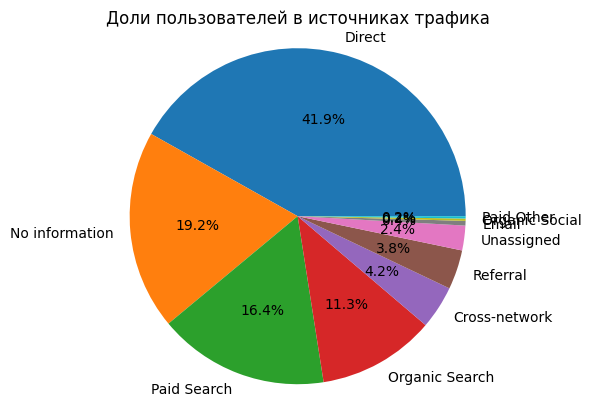

In [8]:
# Построим круговую диаграмму долей источников трафика
fig1, ax1 = plt.subplots()
ax1.pie(source['count'], labels=source['session_default_channel_group'], autopct='%1.1f%%')
ax1.axis('equal')  # чтобы круг был кругом

# Отображение диаграммы
plt.title('Доли пользователей в источниках трафика')
plt.show()

Здесь видно, что некатегоризированный трафик на втором месте по количеству пользователей, а на первом месте прямые заходы - **Direct**, видимо, из сохранённых закладок в браузерах.

### Посмотрим на платежи и трафик

In [9]:
# Построим график количества платежей по источникам трафика
source = (df.groupby('session_default_channel_group')['payment_amount']
                 .sum()
                 .reset_index()
                 .rename(columns={'payment_amount': 'summa'})
                 .sort_values(by='summa', ascending=True))

# Форматируем столбец 'sum' для отображения двух знаков после запятой
source['summa'] = source['summa'].apply('{:.2f}'.format)

# Построим диаграмму
fig = px.bar(source, 
             x='session_default_channel_group', 
             y='summa', 
             text='summa',
             color='session_default_channel_group')

fig.update_layout(title='Платежи по источникам трафика',
                  xaxis_title='Источники',
                  yaxis_title='Платежи',
                  yaxis={'range': [0, None]})  # Устанавливаем минимальное значение оси Y равным нулю

fig.show()

In [10]:
source.head(10)

,session_default_channel_group,summa
6,Paid Other,150.00
2,Email,555.95
5,Organic Social,1200.00
9,Unassigned,2028.30
0,Cross-network,5614.87
8,Referral,7671.25
7,Paid Search,42174.98
4,Organic Search,72641.74
1,Direct,173313.38
3,No information,1076699.75


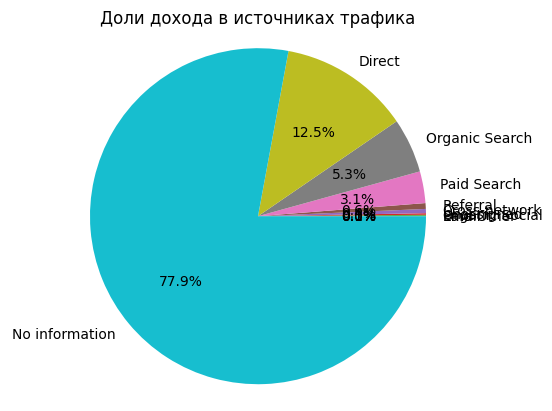

In [11]:
# Построим круговую диаграмму долей источников трафика
fig1, ax1 = plt.subplots()
ax1.pie(source['summa'], labels=source['session_default_channel_group'], autopct='%1.1f%%')
ax1.axis('equal')  # чтобы круг был кругом

# Отображение диаграммы
plt.title('Доли дохода в источниках трафика')
plt.show()

Здесь некатегоризированый трафик принёс больше всего средств. Вероятно, это несколько платежей. Надо проверить. При этом **Direct** на втором месте с сильным отставанием.

Теперь поищем аномалии и выбросы в платежах.

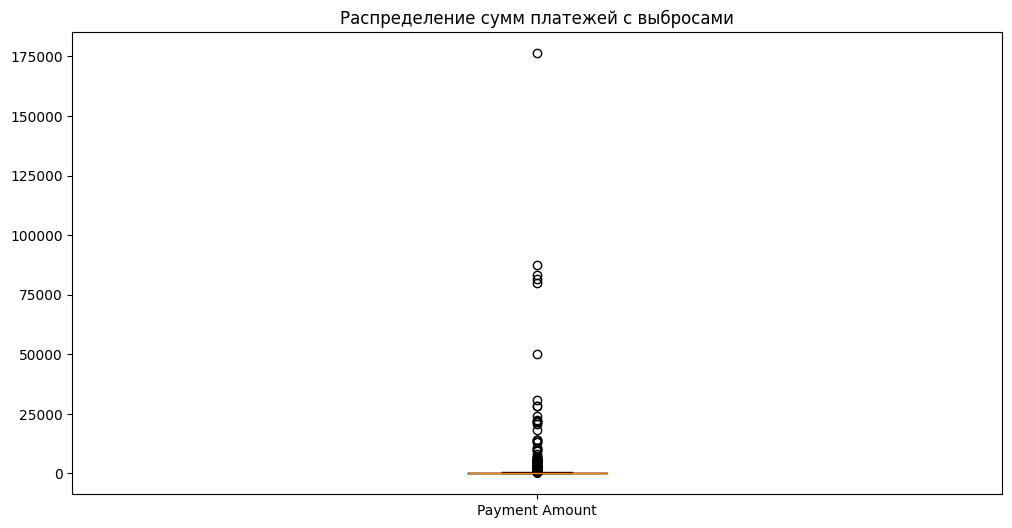

In [12]:
# Находим медиану и квартили
median = df['payment_amount'].median()
q1 = df['payment_amount'].quantile(0.25)
q3 = df['payment_amount'].quantile(0.75)

# Определяем границы для выбросов
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Строим график "ящик с усами"
plt.figure(figsize=(12, 6))
plt.boxplot(df['payment_amount'], labels=['Payment Amount'])
plt.title('Распределение сумм платежей с выбросами')
plt.show()

In [13]:
# Находим значения, которые являются выбросами
outliers = df['payment_amount'].apply(lambda x: (x < lower_bound) | (x > upper_bound)).astype(int)

# Подсчёт количества выбросов
num_outliers = outliers.sum()

# Вывод количества выбросов в print
print(f"Количество выбросов: {num_outliers}")

Количество выбросов: 203


В итоге, 203 выброса - это много, а в условиях рекламного рынка это вряд ли может быть ошибкой. Это, скорее всего, освоение рекламных бюджетов пользователями.

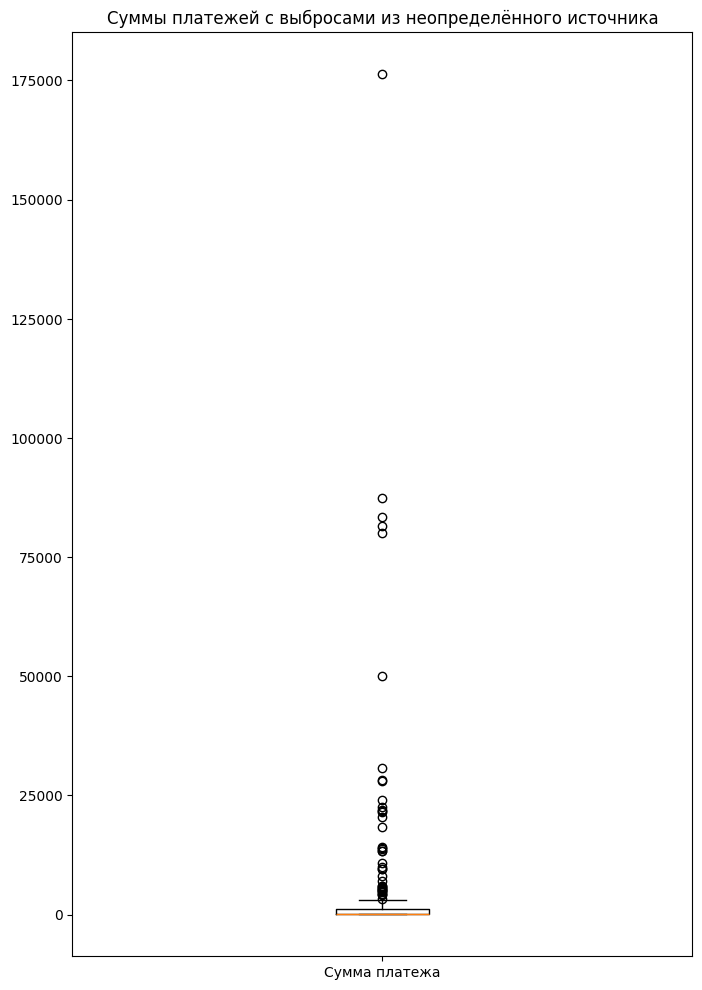

In [14]:
# Фильтрация данных, где в session_default_channel_group есть "No information"
filtered_df = df[df['session_default_channel_group'] == "No information"]

# Вычисление квартилей и медианы
median = filtered_df['payment_amount'].median()
q1 = filtered_df['payment_amount'].quantile(0.25)
q3 = filtered_df['payment_amount'].quantile(0.75)

# Вычисление границ для выбросов
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Построение графика "ящик с усами"
plt.figure(figsize=(8, 12))
plt.boxplot(filtered_df['payment_amount'], labels=['Сумма платежа'])
plt.title('Суммы платежей с выбросами из неопределённого источника')
plt.show()


In [15]:
# Находим значения, которые являются выбросами
outliers_no_information = filtered_df['payment_amount'].apply(lambda x: (x < lower_bound) | (x > upper_bound)).astype(int)

# Подсчёт количества выбросов
n_outliers = outliers_no_information.sum()

# Вывод количества выбросов в print
print(f"Количество выбросов: {n_outliers}")

Количество выбросов: 41


Получается, что из 203 выбросов (крупных платежей) на неопознанный трафик приходится всего 41, или почти 20%. Значит 80% приходится на категоризированный трафик. Занятные цифры, нужно больше данных.

### Транзакции и источники по датам

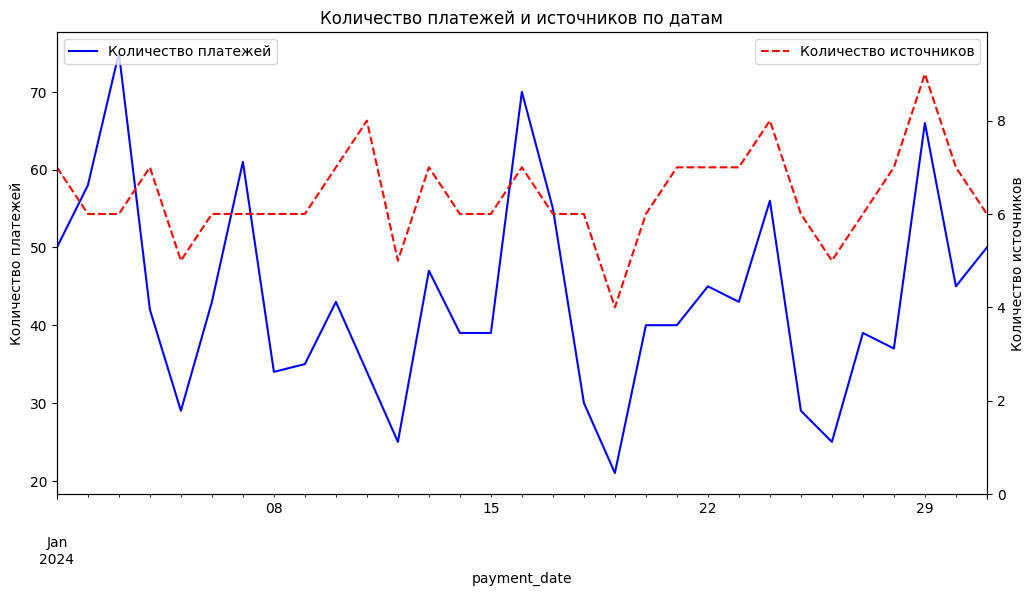

In [16]:
# Создаем два отдельных графика
fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()  # Создаем вторую ось Y

# Отображаем платежи
payments_df = df.groupby(['payment_date'])['payment_id'].count().reset_index(name='count')
sources_df = df.groupby(['payment_date'])['session_default_channel_group'].nunique().reset_index(name='count')

payments_df.plot(x='payment_date', y='count', ax=ax1, label='Количество платежей', color='blue')
ax1.set_ylabel('Количество платежей')

sources_df.plot(x='payment_date', y='count', ax=ax2, label='Количество источников', linestyle='--', color='red')
ax2.set_ylabel('Количество источников')
ax2.set_ylim(0, 1.1 * sources_df['count'].max())  # Устанавливаем пределы оси Y для источников

# Добавляем легенду для первого графика слева
ax1.legend(loc='upper left')

# Добавляем легенду для второго графика справа
ax2.legend(loc='upper right')

# Показываем график
plt.title('Количество платежей и источников по датам')
plt.xlabel('Дата')
plt.show()

Больше всего платежей видим в начале, середине и в конце месяца, когда выделяются рекламные бюджеты. Ещё видно, что с 18 января оба графика синхронизируются, хотя до этого какой-либо корреляции видно не было. Узнать у маркетинга об активности в этот день и предыдущие.

## Считаем метрики маркетинга

Здесь будем искать, какой источник трафика принёс наибольшую долю новых платящих пользователей.

In [17]:
# Расчёт метрики новых платящих пользователей в источниках трафика
df['new_users'] = df['is_ftd'].astype(int)
df['transactions'] = df['payment_amount'].groupby(df['user_id']).transform('count')
df['total_transactions'] = df['payment_amount'].sum()
df['new_user_transactions'] = df['new_users'] * df['payment_amount']
df['new_user_share'] = df['new_user_transactions'] / df['total_transactions']

# Сохранение результатов
results = df[['session_default_channel_group', 'new_user_share']].groupby('session_default_channel_group').mean().reset_index()
results.columns = ['source', 'share']

# Умножаем значения в столбце 'share' на 100
results['share'] = results['share'] * 100

# Добавляем процентный формат к столбцу 'share'
results['share'] = results['share'].apply(lambda x: f"{x:.4f}%")

df.head()

,payment_id,user_id,invoice_id,session_default_channel_group,payment_date,is_ftd,payment_amount,new_users,transactions,total_transactions,new_user_transactions,new_user_share
0,75533919,94225,115359,Paid Search,2024-01-31,False,51.500000,0,3,1382050.25,0.0,0.0
1,75533917,82453,115358,Referral,2024-01-31,False,51.500000,0,2,1382050.25,0.0,0.0
2,75533911,94225,115357,Paid Search,2024-01-31,False,51.500000,0,3,1382050.25,0.0,0.0
3,75533909,13708,115354,Organic Search,2024-01-31,False,150.679993,0,12,1382050.25,0.0,0.0
4,75533907,94205,115353,Direct,2024-01-31,False,51.500000,0,3,1382050.25,0.0,0.0


In [18]:
results.head(10)

,source,share
0,Cross-network,0.0004%
1,Direct,0.0008%
2,Email,0.0012%
3,No information,0.0041%
4,Organic Search,0.0004%
5,Organic Social,0.0000%
6,Paid Other,0.0036%
7,Paid Search,0.0006%
8,Referral,0.0004%
9,Unassigned,0.0008%


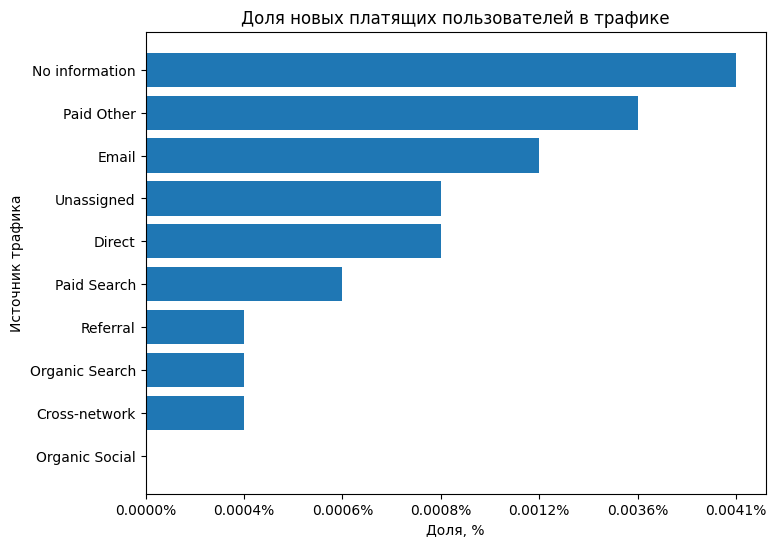

In [19]:
# Сначала отсортируем по столбцу 'share' в порядке возрастания
results = results.sort_values(by='share')

# Создание графика
plt.figure(figsize=(8,6))
plt.barh(results['source'], results['share'])
plt.title('Доля новых платящих пользователей в трафике')
plt.xlabel('Доля, %')
plt.ylabel('Источник трафика')
plt.show()

## Выводы

Из представленных данных можно сделать вывод, что самым результативным источником привлечения клиентов является **No information**, то есть неопределённый источник трафика, который имеет самую высокую долю новых платящих пользователей - 0.0041% и самую большую сумму транзакций. Однако, стоит учесть, что это может быть связано с тем, что некоторые переходы не были атрибутированы к конкретному источнику и были отнесены к этой категории.

Под *результативностью* в данном контексте понимается способность источника привлекать новых платящих пользователей. Чем выше доля новых платящих пользователей от конкретного источника, тем более результативным он считается.

Из проведённого анализа можно сделать следующие выводы:

1. **No information** (пропущенные значения в колонке с источником трафика) показывает неожиданно высокий результат - 0.0041%. Это может быть связано с тем, что некоторые переходы не были атрибутированы к конкретному источнику, и они были отнесены к этой категории.

2. **Paid Other** (оплаченный трафик) также показывает высокий результат - 0.0036%. Это может быть связано с тем, что платформа активно использует платные источники трафика, которые не были указаны в отчёте.

3. **Email-маркетинг** является наиболее эффективным источником трафика, приносящим 0.0012% платежей от общего числа переходов. Это может быть связано с тем, что email-маркетинг позволяет напрямую обращаться к целевой аудитории и предлагает персонализированный контент.

4. **Organic Social** (органический трафик из соцсетей) имеет нулевой результат, потому что платформа слабо использует органический социальный трафик или не имеет большого количества подписчиков в социальных сетях.

5. **Organic Search** (органический трафик из поисковиков) и **Referral** (партнёрские программы) имеют одинаковый результат - 0.0004%. Это может быть связано с тем, что платформа слабо использует SEO или имеет ограниченное количество рефералов.

6. **Cross-network** (межсетевой), **Direct** (прямой трафик), **Paid Search** (оплаченный поиск) и **Unassigned**  (неназначенный трафик) имеют низкие результаты, потому что платформа мало использует эти источники трафика или они не являются эффективными для бизнеса.

Сравнивая источники трафика по количеству новых платящих пользователей и сумме платежей, можно увидеть, что:

- **No information** приносит наибольшее количество новых платящих пользователей и наибольшую прибыль, правда с учётом нескольких крупных платежей.
- **Paid Other** приносит меньше новых платящих пользователей, но является одним из наиболее прибыльных источников.
- **Email-маркетинг** приносит наибольшее количество новых платящих пользователей, но не является самым прибыльным источником.
- **Organic Social** почти не приносит новых платящих пользователей и не приносит прибыли.
- **Organic Search** и **Referral** приносят одинаковое количество новых платящих пользователей, но не являются прибыльными источниками.
- **Cross-network**, **Direct**, **Paid Search** и **Unassigned** приносят меньше новых платящих пользователей и не являются прибыльными источниками.

Таким образом, для увеличения прибыли платформы следует обратить внимание на источники, которые приносят наибольшую прибыль, такие как **Paid Other**, **Email** и **Organic Social**. Однако, для увеличения количества новых платящих пользователей, необходимо работать над увеличением эффективности источников, таких как **Email-маркетинг** и разобраться с **No information**.

Учитывая специфику бизнеса платформы для покупки рекламного трафика onclicka.com, можно рекомендовать следующие стратегии:

1. Увеличить инвестиции в **email-маркетинг**, так как он показывает наибольшую эффективность.

2. Проанализировать, какие источники трафика были отнесены к категориям **No information** и **Paid Other**, чтобы лучше понять, какие из них работают лучше всего.

3. Улучшить **SEO** и увеличить активность в **социальных сетях**, чтобы увеличить органический и социальный трафик.

4. Пересмотреть стратегии использования платных источников трафика, таких как **Paid Search** и **Paid Other**, чтобы убедиться, что они эффективны и приносят ожидаемый результат.

5. Продолжить анализ метрик и данных, чтобы лучше понимать, какие источники трафика работают лучше всего для бизнеса платформы.

В целом, платформа может рассмотреть возможность увеличения инвестиций в продолжение работы над оптимизацией существующих каналов.